#                                         Investment Assignment

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

<br>

Importing all required libraries.

In [659]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import chardet


Extending maximum number of rows visible.

In [660]:
pd.set_option('display.max_rows', 5000)

Using chardet module trying to find the encoding of the data set. we have recived ascii as the encoding with confidence of 1.0, but it was not sucessful.

In [661]:
with open('D:/Programing/Upgrad/Investment_Assignment/companies.csv','rb') as raw_data:
    result=chardet.detect(raw_data.read(2000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Tried with diffrent encodings, unicode_escape has worked.Using pandas read_csv to read the companies data to companies dataframe.

In [662]:
companies = pd.read_csv(r'D:/Programing/Upgrad/Investment_Assignment/companies.csv',encoding='unicode_escape')

Using pandas read_csv to read the rounds2 data to rounds2 dataframe.

In [663]:
rounds2 = pd.read_csv(r'D:/Programing/Upgrad/Investment_Assignment/rounds2.csv',encoding='unicode_escape')

Checking the shape of the companies data frame.

In [664]:
companies.shape

(66368, 10)

Checking the shape of the rounds2 data frame.

In [665]:
rounds2.shape

(114949, 6)

Checking the info of the companies data frame. Through this we can come to know the no of columns it has and type of each column.

In [666]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


Checking the info of the rounds2. Through this we can come to know the no of columns it has and type of each column.

In [667]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


<br>

Lets check what other companies are present in round2 other than the companies in companies.csv file.

In [668]:
rounds2[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [671]:
rounds2.company_permalink=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies.permalink=companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')

Converting all the names to lower so that it will be easy for us to find the duplicates.

In [672]:
companies.permalink=companies.permalink.apply(lambda x: x.lower())

In [673]:
companies.permalink.value_counts()

/organization/medaware                1
/organization/chatosity               1
/organization/gigawatt                1
/organization/dynagent-software-sl    1
/organization/tangoo                  1
                                     ..
/organization/pikanote                1
/organization/holdings-industries     1
/organization/addashop                1
/organization/maine                   1
/organization/human-longevity         1
Name: permalink, Length: 66368, dtype: int64

How many unique companies are present in the companies file?
<br>
Calculating the unique companies by using unique function.

In [674]:
len(companies.permalink.unique())

66368

Converting all the names to lower so that it will be easy for us to find the duplicates.

In [675]:
rounds2.company_permalink=rounds2.company_permalink.apply(lambda x: x.lower())

How many unique companies are present in rounds2?
<br>
Calculating the unique companies by using unique function.

In [676]:
len(rounds2.company_permalink.unique())

66368

There are no new companies present in rounds2 file , which are not present in companies file.

Merging the two data frames using inner join so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Named the merged data frame as master_frame. 

In [677]:
master_frame=pd.merge(companies,rounds2, how='inner', right_on= 'company_permalink',left_on='permalink')

After merging two data frames, we have recieved two permalin columns.Dropping the company_permalink column as we have same column.

In [678]:
master_frame=master_frame.drop(['company_permalink'],axis=1)

In [679]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Post merging the two data frames we have recived 114949 rows.

In [680]:
master_frame.shape

(114949, 15)

In [681]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

Checking the null values in the master_frame data frame.

In [682]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

As our main aim is to invest in english speaking countries , so there is no use of blank rows in raised amount usd  and country code columns.
To get the accurate results we need to remove null values.

In [683]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [684]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [685]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                3378
category_list                579
status                         0
country_code                   0
state_code                  1753
region                      1197
city                        1194
founded_at                 13658
funding_round_permalink        0
funding_round_type             0
funding_round_code         62171
funded_at                      0
raised_amount_usd              0
dtype: int64

we can see There are many null values in State code, region, city columns. removing them as they are unnecessary columns.

In [686]:
master_frame=master_frame.drop(['state_code','region','city'],axis=1)

we know that investment type should be angel, venture , seed , private equity.so filtering the data based on the round_type.

In [687]:
round_type=['angel','venture','seed','private_equity']
master_frame=master_frame[(master_frame.funding_round_type.isin(round_type))]


In [688]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                2672
category_list                482
status                         0
country_code                   0
founded_at                 11496
funding_round_permalink        0
funding_round_type             0
funding_round_code         48685
funded_at                      0
raised_amount_usd              0
dtype: int64

In [689]:
#master_frame =master_frame[~(master_frame.founded_at.isnull())]

Now very few columns have null values. we cant remove the funding_round_code as non venture rows are null values. if we keep on removing all the null values there wont be data left. so we can ignore other null columns, as we dont use them for our calculations. 

In [690]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75606 entries, 0 to 114947
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                75606 non-null  object 
 1   name                     75605 non-null  object 
 2   homepage_url             72934 non-null  object 
 3   category_list            75124 non-null  object 
 4   status                   75606 non-null  object 
 5   country_code             75606 non-null  object 
 6   founded_at               64110 non-null  object 
 7   funding_round_permalink  75606 non-null  object 
 8   funding_round_type       75606 non-null  object 
 9   funding_round_code       26921 non-null  object 
 10  funded_at                75606 non-null  object 
 11  raised_amount_usd        75606 non-null  float64
dtypes: float64(1), object(11)
memory usage: 7.5+ MB


# Representative Values of Investments for Each of these Funding Types

In [691]:
ventures = master_frame.groupby(['funding_round_type'])
ventures.median()

,raised_amount_usd
funding_round_type,
angel,410737.0
private_equity,20000000.0
seed,300000.0
venture,5000000.0


From the above result we can come to know that private_equatiy is having highest investment amount, but we cant proceed it with it as the private_equity fundings are very high. we go with venture inestments as it is in our limit. if we recive profits then we can start going to private_equatiy investments.

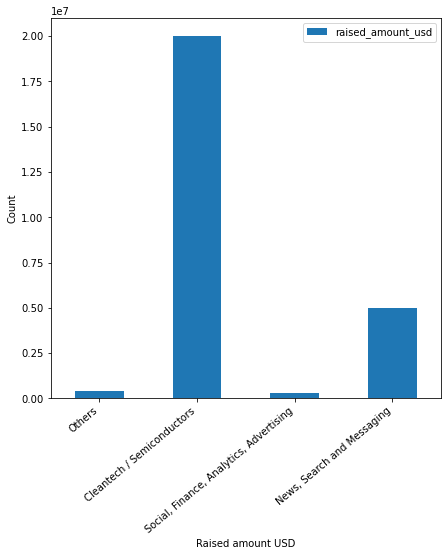

In [692]:
p= master_frame.groupby(['funding_round_type']).median().plot.bar(ylabel='Count',xlabel='Raised amount USD',figsize=(7,7))
p.set_xticklabels(ma.get_xticklabels(), rotation=40, ha="right")
plt.show()

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, Filtering the data by the investment amount range i.e between 5000000 and 15000000 .

In [693]:
master_frame = master_frame[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

As we have decided venture as our funding type, so filtering the data with venture.

In [694]:
master_frame=master_frame[master_frame.funding_round_type == 'venture']

#### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

Now we need to pick up the top 9 countries from the master_frame data frame. so we use groupby function to get the top 9 countries.

In [695]:
top9 = master_frame.groupby(['country_code']).sum().sort_values(by='raised_amount_usd',ascending= False)
top9[0:9]

,raised_amount_usd
country_code,
USA,1.085313e+11
GBR,5.436844e+09
CHN,5.016561e+09
CAN,3.647010e+09
IND,2.976544e+09
ISR,2.840306e+09
FRA,2.112425e+09
DEU,1.765026e+09
SWE,6.550407e+08


#### Identify the top three English-speaking countries in the data frame top9.

From the above result we need to pick top 3 english speaking countries. in top 3 countries we have USA,GBR,CNH.
In china English is not an official language. In Cannada English is official but in some regions(Quebec and Nunavut) english is not spoken, So we are considering India as the third country.

Now you also know the three most investment-friendly countries and the most suited funding type for Spark Funds. Let us now focus on finding the best sectors in these countries.

To find the best sector we need to read mapping csv file and we use unicode_escape as ecoding to remove encoded test in the file.

In [696]:
mapping = pd.read_csv(r'D:/Programing/Upgrad/Investment_Assignment/mapping.csv',encoding='unicode_escape')

In [697]:
mapping.shape

(688, 10)

In [698]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [699]:
master_frame = master_frame[ ~ master_frame.category_list.isnull()]

Checking the categories available in the mapping data set.

In [700]:
master_frame.category_list

0                                    Media
12                               Analytics
22        Apps|Cable|Distribution|Software
46            Local Businesses|Restaurants
50                  Cosmetics|Marketplaces
                        ...               
114916                            Software
114920                       Biotechnology
114922                       Biotechnology
114931                       Biotechnology
114936                       Biotechnology
Name: category_list, Length: 15771, dtype: object

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

so we are removing the optional values from the category_list column using the sample function.

In [701]:
def sample(x):
    if '|' not in x:
        return x
       
    else:
        a=x.split('|')
        return a[0]
        



In [702]:
master_frame.category_list = master_frame.category_list.apply(lambda x : sample(x))
master_frame

,permalink,name,homepage_url,category_list,status,country_code,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
46,/organization/1001-menus,ZenChef,http://zenchef.com/en/,Local Businesses,operating,FRA,20-11-2010,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0
50,/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics,operating,FRA,01-01-2012,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114916,/organization/zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,30-11-2011,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,8400000.0
114920,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114931,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0


melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.

We use melt() function to filter the unwanted null values.

In [703]:
mapping=pd.melt(mapping, id_vars='category_list')

After filtering the data we keep only the rows having values as 1.

In [704]:
mapping=mapping[mapping.value == 1]

Now we have got the eight main sectors.

In [705]:
mapping.variable.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Blanks                                       1
Name: variable, dtype: int64

Now data frame with each primary sector mapped to its main sector by merging the mapping and master_frame data frames.

In [706]:
master_frame=pd.merge(master_frame,mapping, how='inner', on='category_list')

In [707]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,variable,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Entertainment,1
3,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Entertainment,1
4,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,NaN,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,Entertainment,1


Grouping the data with variable.

In [708]:
mapping=master_frame.groupby('variable')

In [709]:
mapping.get_group('Manufacturing').head()

,permalink,name,homepage_url,category_list,status,country_code,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,variable,value
521,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,Manufacturing,1
522,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,01-01-2007,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,Manufacturing,1
523,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,01-01-2007,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,Manufacturing,1
524,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,01-01-2007,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0,Manufacturing,1
525,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,01-01-2007,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.0,Manufacturing,1


In [710]:
mapping.raised_amount_usd.sum()

variable
Automotive & Sports                        2.186917e+09
Cleantech / Semiconductors                 2.727571e+10
Entertainment                              7.629292e+09
Health                                     1.019473e+10
Manufacturing                              9.580386e+09
News, Search and Messaging                 1.812759e+10
Others                                     3.396752e+10
Social, Finance, Analytics, Advertising    2.100775e+10
Name: raised_amount_usd, dtype: float64

Created three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames will contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, we can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [711]:
d1=master_frame[master_frame.country_code=='USA']

In [712]:
d2=master_frame[master_frame.country_code=='GBR']

In [713]:
d3=master_frame[master_frame.country_code=='IND']

### Total number of investments (count)

In [714]:
d1.shape

(11149, 14)

In [715]:
d2.shape

(577, 14)

In [716]:
d3.shape

(299, 14)

### Total amount of investment (USD)

In [717]:
d1.raised_amount_usd.sum()

99661524549.0

In [718]:
d2.raised_amount_usd.sum()

5028704358.0

In [719]:
d3.raised_amount_usd.sum()

2683537552.0

### Top sectors (based on count of investments)

In [720]:
d1.groupby(['variable']).sum().sort_values(by='raised_amount_usd',ascending= False)

,raised_amount_usd,value
variable,,
Others,2.608928e+10,2923
Cleantech / Semiconductors,2.118100e+10,2297
"Social, Finance, Analytics, Advertising",1.668070e+10,1912
"News, Search and Messaging",1.379682e+10,1563
Health,8.200859e+09,908
Manufacturing,7.258553e+09,799
Entertainment,5.000213e+09,580
Automotive & Sports,1.454104e+09,167


In [721]:
d2.groupby(['variable']).sum().sort_values(by='raised_amount_usd',ascending= False)

,raised_amount_usd,value
variable,,
Others,1.249124e+09,143
Cleantech / Semiconductors,1.136905e+09,127
"Social, Finance, Analytics, Advertising",8.218884e+08,98
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.615111e+08,54
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16


In [722]:
d3.groupby(['variable']).sum().sort_values(by='raised_amount_usd',ascending= False)

,raised_amount_usd,value
variable,,
Others,1.007410e+09,109
"News, Search and Messaging",4.338345e+08,52
"Social, Finance, Analytics, Advertising",2.905435e+08,32
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Health,1.677400e+08,19
Cleantech / Semiconductors,1.653800e+08,20
Automotive & Sports,1.369000e+08,13


### Number of investments in the top sector

In [723]:
a=d1.groupby(['permalink','variable']).sum().sort_values(by='raised_amount_usd',ascending= False)
a[0:10]

,,raised_amount_usd,value
permalink,variable,,
/organization/airspan-networks,"News, Search and Messaging",81769000.0,9
/organization/biodesix,Cleantech / Semiconductors,75300000.0,8
/organization/avnera,Entertainment,71062970.0,7
/organization/tigo-energy,Cleantech / Semiconductors,68739496.0,8
/organization/endogastric-solutions,Health,67896724.0,7
/organization/virtustream,Others,64300000.0,6
/organization/intacct,"Social, Finance, Analytics, Advertising",61800000.0,5
/organization/forsight-labs,Cleantech / Semiconductors,61300001.0,7
/organization/lotame,"Social, Finance, Analytics, Advertising",59700000.0,5


In [724]:
b=d2.groupby(['permalink','variable']).sum().sort_values(by='raised_amount_usd',ascending= False)
b[0:10]

,,raised_amount_usd,value
permalink,variable,,
/organization/greenroad-technologies,Automotive & Sports,52500000.0,4
/organization/celltick-technologies,"Social, Finance, Analytics, Advertising",37500000.0,4
/organization/ubiquisys,"News, Search and Messaging",37000000.0,4
/organization/electric-cloud,Others,37000000.0,4
/organization/sensage,Others,36250000.0,4
/organization/shozu,"News, Search and Messaging",36000000.0,3
/organization/eusa-pharma,Cleantech / Semiconductors,35600000.0,3
/organization/autoquake,Automotive & Sports,35557140.0,4
/organization/mythings,"Social, Finance, Analytics, Advertising",34000000.0,4


In [725]:
c=d2.groupby(['permalink','variable']).sum().sort_values(by='raised_amount_usd',ascending= False)
c[0:10]

,,raised_amount_usd,value
permalink,variable,,
/organization/greenroad-technologies,Automotive & Sports,52500000.0,4
/organization/celltick-technologies,"Social, Finance, Analytics, Advertising",37500000.0,4
/organization/ubiquisys,"News, Search and Messaging",37000000.0,4
/organization/electric-cloud,Others,37000000.0,4
/organization/sensage,Others,36250000.0,4
/organization/shozu,"News, Search and Messaging",36000000.0,3
/organization/eusa-pharma,Cleantech / Semiconductors,35600000.0,3
/organization/autoquake,Automotive & Sports,35557140.0,4
/organization/mythings,"Social, Finance, Analytics, Advertising",34000000.0,4


Created three new data frames for collecting the data of the top 3 sectors and merging them into one final data frame final.

In [726]:
x1=['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors']
d1=d1[d1.variable.isin(x1)]

In [727]:
x2=['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors']
d2=d2[d2.variable.isin(x2)]

In [728]:
x3=['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging']
d3=d3[d3.variable.isin(x3)]

In [729]:
final=pd.concat([d1,d2,d3],axis=0)

#### A plot showing the representative amount of investment in each funding type. This chart will make it clear that a certain funding type (FT) is best suited for Spark Funds.   

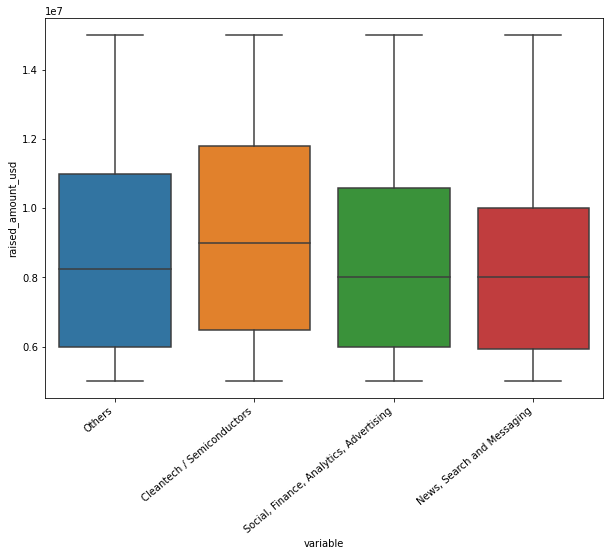

In [730]:
import seaborn as sns
plt.figure(figsize=[10,7])

ma=sns.boxplot(x= final.variable,y= final.raised_amount_usd)
ma.set_xticklabels(ma.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. 

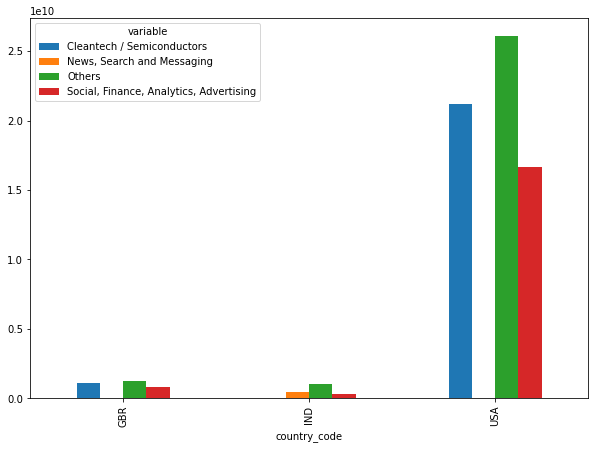

In [731]:
final.groupby(['country_code', 'variable'])['raised_amount_usd'].sum().unstack().plot.bar(figsize=(10,7))
plt.show()

#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

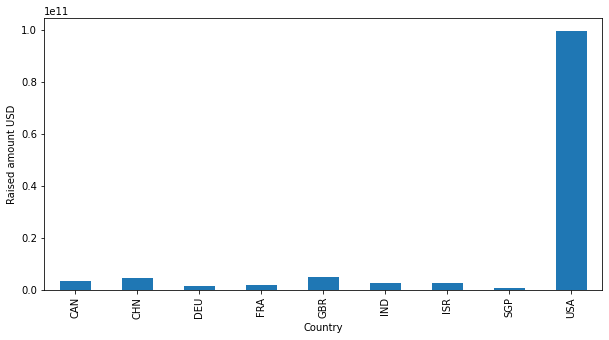

In [732]:
top9 = master_frame.groupby(['country_code']).sum().sort_values(by='raised_amount_usd',ascending= False)
z=top9[0:9]
z.groupby(['country_code'])['raised_amount_usd'].sum().plot.bar(xlabel='Country',ylabel='Raised amount USD',figsize=(10,5))
plt.show()